## Learning Objectives

After reading this notebook, students will be able to:

- Know the concepts of linearly Non Separable Data
- Transform features to another space
- Slack Variables Equation

So far we have explored Kernel trick as a way of classsifying linearly non-separable data. In this section, we will learn about slack variables, which is another method for separating linearly non-separable data for Soft Margin SVM.

<div align="center">
    <figure>
     <img src="https://i.postimg.cc/Y2xsLZsk/image.png", width=700>
     <figcaption>
     Figure 1: Linearly Separable Datapoints: (Left) Scatter data points, (Right) data points with hyperplane
     </figcaption>
    </figure>
</div>

<div align="center">
    <figure>
     <img src="https://i.postimg.cc/g0dhhS5F/image.png", width=700>
     <figcaption>
     Figure 2: Scatter Binary Datapoints: (Left) Non linear data points, (Right) In-separable data points
     </figcaption>
    </figure>
</div>

Here's a quick recap of what Kernels are and a trailer to what we will be learning in this portion.
1. **Feature Map/ Kernels** : Maps the data into a higher-dimensional space using a kernel function, allowing SVM to find a separating hyperplane without explicitly transforming the data.
2. **Introducing Slack Variable**: Allows SVM to tolerate some misclassification in cases where perfect separation isn’t possible, even in higher dimensions.
Balances maximizing the margin and minimizing classification error by introducing a penalty for points that violate the margin (Soft Margin SVM).

The figure below shows how the non linear data(circular data points) in 2D space change to linearly separable by mapping to a higher dimension, i.e., 3D space.

<div align="center">
    <figure>
     
![Kernel](https://i.postimg.cc/vZG9g2CR/image.png)
     <figcaption>
     Figure 3: Plot Non linear Datapoints: (1) data points in 2D, (2 & 3) Plot in Higher dimension
     </figcaption>
    </figure>
</div>

**Note:**  Please visit the chapter kernel to learn more about its working mechanism.

In this chapter, we will discuss the nonlinear separable case using slack variables. Before that, let's recall the equation of maximum margin classifier. i.e.,

$$\text{min}_{\textbf{w},b} \ \ \  \ \frac{1}{2}||\textbf{w}||^2 \tag{1}$$

$\text{subject to:}$
$$\ \ \  \ y_i(\textbf{w}^T.x_i +b ) \geq 1, \ \ \ \ i = 1,...., n$$


In Figure (3), the left side shows circularly distributed data points, while the right side displays overlapping classes with an inseparable point. In the right figure, a single data point is misclassified, appearing on the opposite side of its intended class.

To handle such cases, we can modify the standard SVM algorithm to find a more suitable hyperplane even when class data overlaps. This overlap often results from misclassified or noisy data, which makes perfect separation impossible. By introducing slack variables, we allow the SVM to tolerate some misclassifications and achieve a better generalization.

To solve the problem of suboptimal hyperplane in the case of mislabeled data, we introduce a slack variable $\xi = \{\xi_1, \xi_2, \dots, \xi_n\}$ and modify the constraints as,
$$
\begin{align}
y_i(\textbf{w}^\intercal x_i + b) &\geq 1 - \xi_i, \quad i = 1, \ldots, n \\
\xi_i &\geq 0, \quad i = 1, \ldots, n \tag{2}
\end{align}
$$

The value of $\xi_i$ in $y_i ( \textbf{w}^\intercal x_i + b) \geq 1 - \xi_i$ is the proportional amount by which the prediction $\textbf{w}^\intercal x_i+ b$ is on the wrong side of the margin. The value of $\xi_i$ is more than one when $x_i$ is being misclassified.

Now we add the term into the minimization problem so that we minimize $\|\textbf{w}\|^2 + C \cdot \text{(distance of misclassified points from the current line)}$. That means the optimization formula becomes:

$$
\text{min}_{\textbf{w},b} \ \ \ \ \|\textbf{w}\|^2 + C \sum_{i=1}^n \xi_i \tag{3}
$$

Also,
$$
\begin{align}
\xi_i =
\begin{cases}
    1 - y_i( \textbf{w}^\intercal x_i + b) & \text{if} \hspace{0.5cm} y_i(\textbf{w}^\intercal x_i + b) \lt 1 \\
    0 & \text{if} \hspace{0.5cm} y_i (\textbf{w}^\intercal x_i + b) \geq 1
\end{cases} \tag{4}
\end{align}
$$

The parameter $\mathcal{C}$ in equation $(3)$ is known as cost parameter and is the hyperparameter of SVM. In equation $(4)$, the value of $\xi_i$ is zero when the point $x_i$ is correctly classified by the model and also is not inside the margin or far from margin ($i.e \hspace{0.5cm}y_i (\textbf{w}^\intercal x_i + b) \geq 1$) and has some value when the data is misclassified.

Equation $(3)$ can be written as,

$$
\begin{align}
\min_{\textbf{w}, b} \textbf{w}^\intercal \textbf{w} + \mathcal{C} \sum_{i=1}^n \max(1-y_i(\textbf{w}^\intercal \mathbf x_i + b), 0) \tag{5}
\end{align}
$$

Now, the equation (5) needs to be minimized with respect to $\textbf{w}$ using algorithms like gradient descent to optimize the function. The terms in the equation $(5)$ can be categorized into two parts:
- The regularization term
- The loss function.

$$
\begin{align}
\text{Regularization}, \mathcal{R}_{\textbf{w}} &= \min_{\textbf{w}, b} \textbf{w}^\intercal \textbf{w} \\
\text{Loss}, \mathcal{L}_\textbf{w}{(x, y)} &= \mathcal{C} \sum_{i=1}^n max(1 - y_i (\textbf{w}^\intercal \mathbf x_i + b), 0)
\end{align}
$$

Then, the cost of learning algorithm can be written as,
$$
\begin{align}
Cost_{\textbf{w}}(x, y) &= \mathcal{L}_{\textbf{w}(x, y)} + \gamma \mathcal{R}_{\textbf{w}} \tag{6}
\end{align}
$$

In the equation, $(6)$, $\gamma$ is the regularization parameter and is the hyperparameter of our learning algorithm.


The make_classification function from scikit-learn is used to generate synthetic data for two classes. We then train different SVM models using varying values of the cost parameter 𝐶.

The value of 𝐶 directly influences the trade-off between margin size and classification error:

- Lower 𝐶 encourages a larger margin by allowing more slack ($
\xi_i$>0), even if it means more classification errors.

- Higher 𝐶 penalizes misclassifications more heavily, leading to a smaller margin and stricter separation of the data.

Therefore, the algorithm faces a decision:

- Allow slack (larger $\xi_i$) to get a wider margin but accept some misclassifications.
- Or minimize slack (smaller $\xi_i$) to reduce classification errors, resulting in a narrower margin and stronger regularization.


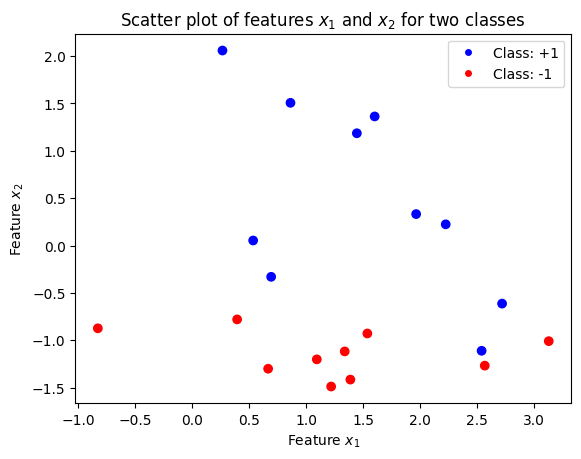

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=20, n_features=2, n_redundant=0, n_repeated=0,
                          n_classes=2, n_clusters_per_class=1, random_state=25, weights=[0.5,0.5], class_sep=1)

y = y * 2 - 1

scatter = plt.scatter(X[:, 0], X[:, 1], c=['r' if _y < 0 else 'b' for _y in y])
plt.title("Scatter plot of features $x_1$ and $x_2$ for two classes")
plt.ylabel("Feature $x_2$")
plt.xlabel("Feature $x_1$")

lp = Line2D(range(2), range(1), color="white", marker='o', markerfacecolor="blue")
ln = Line2D(range(2), range(1), color="white", marker='o', markerfacecolor="red")

plt.legend(handles=(lp, ln), labels=("Class: +1", "Class: -1"))


In [ ]:
def train_svm(Xin, yin, C, gamma, lr=0.01):
    np.random.seed(17)

    theta = np.random.randn(Xin.shape[1])
    b = np.random.rand()

    N = X.shape[0]
    learning_rate = 0.01

    epochs = 1000
    for epoch in range(epochs):
        dtheta = np.zeros_like(theta)
        db = 0
        for i in range(N):
            pred =  np.dot(theta.T, X[i]) + b
            if (yin[i] * pred) < 1:
                dtheta = dtheta - np.dot(yin[i], X[i].T)
                db = db - yin[i]

        dtheta =  C * dtheta + 2 * gamma * theta
        db = C * db

        theta = theta - learning_rate * dtheta
        b = b - learning_rate * db

    return theta, b

In [ ]:
def plot_hyperplane(Xin, yin, theta, b):
    plt.scatter(Xin[:, 0], Xin[:, 1], c=['r' if _y < 0 else 'b' for _y in y])
    xmin, xmax = -5, 5
    ymin, ymax = -5, 5
    npoints = 500

    _xm = np.linspace(xmin, xmax, npoints)
    _ym = np.linspace(ymin, ymax, npoints)

    color_margin = '#3385ff'

    Xs, Ys = [], []
    colors = []

    for _x in _xm:
        for _y in _ym:
            v = np.dot(theta.T, np.array([[_x], [_y]])) + b
            if v >= -1 and v <= 1:
                Xs.append(_x)
                Ys.append(_y)
                colors.append(color_margin)

    plt.scatter(Xs, Ys, c=colors, alpha=0.3)
    plt.axis([xmin, xmax, ymin, ymax])

    _x = np.linspace(xmin, xmax, npoints)
    _y = - (_x * theta[0] + b)/theta[1] # y for every _x from optimal hyperplane

    _yp = (1 - _x * theta[0] - b)/theta[1] # hyperplane at the positive side

    _yn = (-1 - _x * theta[0] - b)/theta[1] # hyperplane at the negative side

    plt.scatter(X[:, 0], X[:, 1], c=['r' if _y < 1 else 'b' for _y in y])
    plt.plot(_x, _y, c='r')
    plt.plot(_x, _yn, c='y', alpha=0.8)
    plt.plot(_x, _yp, c='y', alpha=0.8)

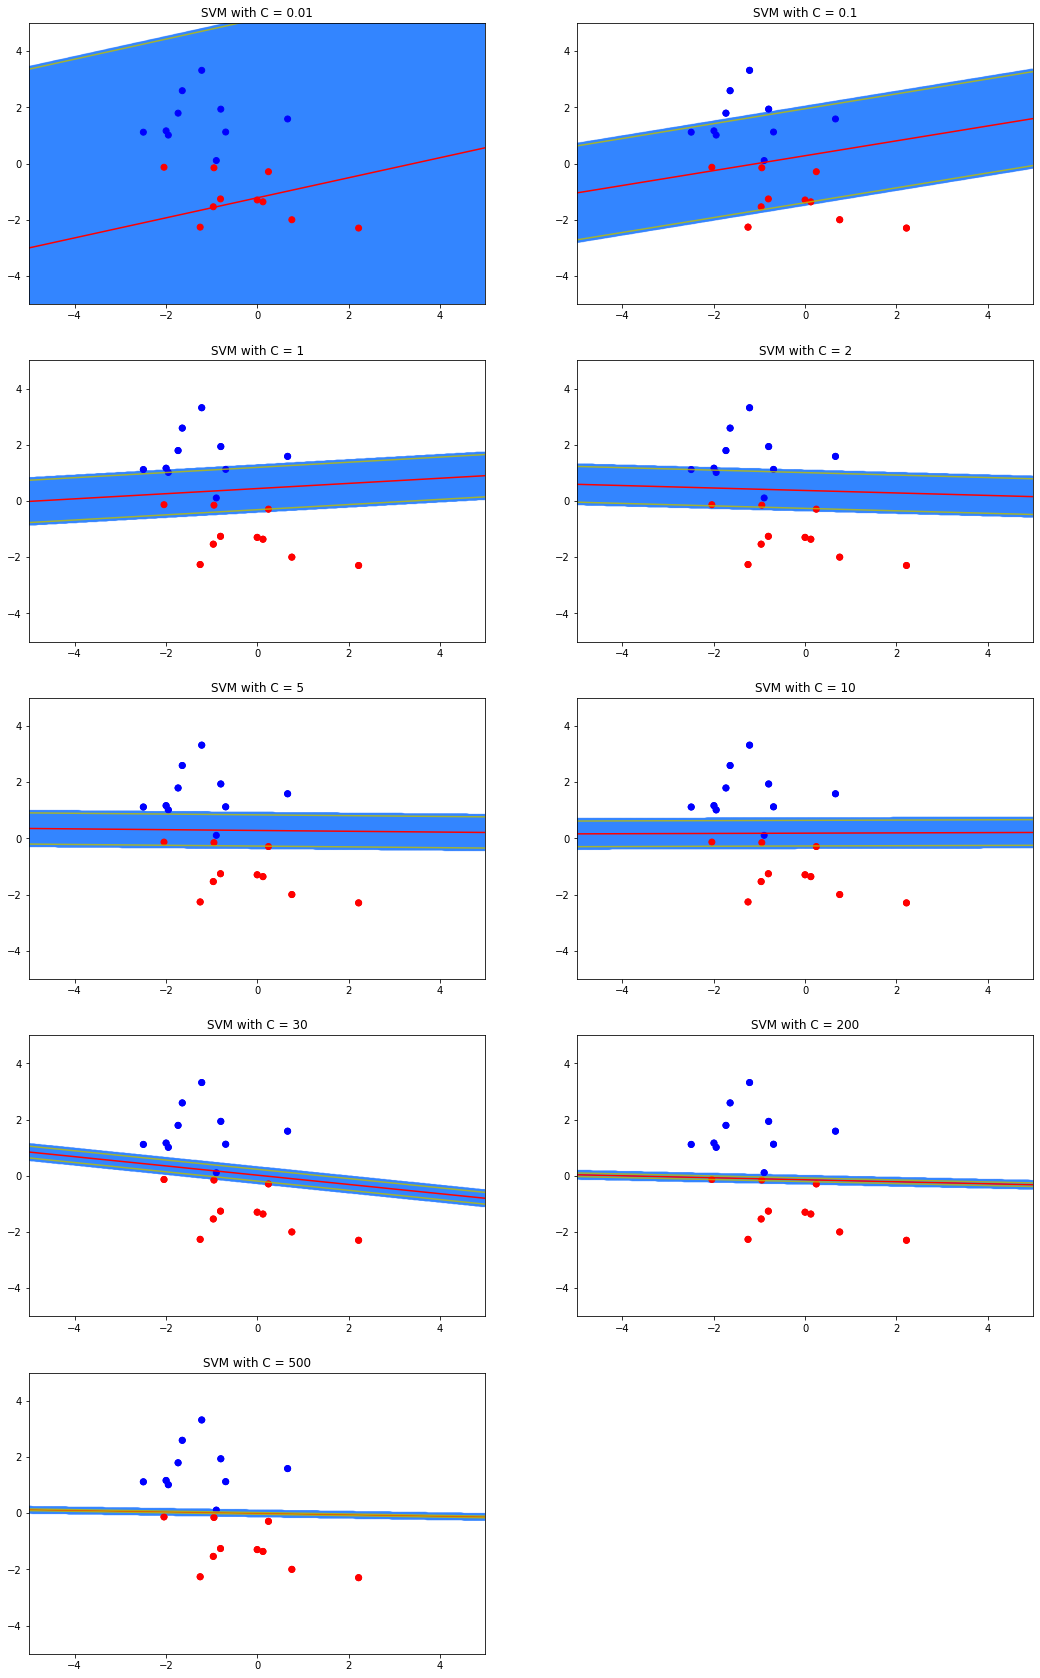

In [ ]:
C = [0.01, 0.1, 1, 2, 5, 10, 30, 200, 500]
gamma = 0.9

plt.figure(figsize=(18,30))
plt.rcParams['figure.facecolor'] = 'white'

ncols = 2
nrows = np.ceil(len(C)/ncols)

for i, _C in enumerate(C):
    theta, b = train_svm(X, y, _C, gamma)
    plt.subplot(nrows, ncols, i+1)
    plot_hyperplane(X, y, theta, b)
    plt.title(f'SVM with C = {_C}')

plt.show()

From the above plots, we can see that when the value of $\mathcal{C}$ increases, the margin decreases.

A large enough value of $\mathcal{C}$ ($\mathcal{C} \rightarrow \infty$) tries to fit the data without allowing any slacks. This condition may not always be able to find a solution when the classes are overlapping.

## Key Takeaways
- Kernel is used to map data to a higher dimension and make linearly separable.

- Slack variable to penalize the few misclassifications.

 $$
\begin{align}
\min_{\textbf{w}, b} \textbf{w}^T \textbf{w} + \mathcal{C}\sum_{i=1}^n \max(1-y_i(\textbf{w}^\intercal \mathbf x_i + b), 0)
\end{align}
$$

\\

$$
\begin{align}
\text{Regularization}, \mathcal{R}_{\textbf{w}} &= \min_{\textbf{w}, b} \textbf{w}^\intercal \textbf{w}
\end{align}
$$
$$
\begin{align}
\text{Loss}, \mathcal{L}_\textbf{w}{(x, y)} &= \mathcal{C} \sum_{i=1}^n max(1 - y_i (\textbf{w}^\intercal \mathbf x_i + b), 0)
\end{align}
$$




- Lower the cost parameter $\mathcal{C}$, Large the margin and vice-versa.

- The Loss is directly proportional to $\mathcal{C}. \xi_i$

  - if any of the value of $\xi_i$ increases keeping $\mathcal C$ constant.
  - if $\mathcal C$ increases, keeping all the $\xi_i$ constant.
